In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Since features are already scaled, we can proceed directly
# We'll use the 'Amount' feature for Z-Score analysis


In [ ]:
from scipy.stats import zscore

# Calculate Z-Scores for the 'Amount' feature
df['Amount_Zscore'] = zscore(df['Amount'])

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
df['Z_Outlier'] = df['Amount_Zscore'].apply(lambda x: abs(x) > threshold)


In [ ]:
# Count of identified outliers
print("Number of outliers detected:", df['Z_Outlier'].sum())

# Compare with actual fraud cases
z_outliers = df[df['Z_Outlier'] == True]
frauds_in_z_outliers = z_outliers['Class'].sum()
print("Number of actual frauds in detected outliers:", frauds_in_z_outliers)


Number of outliers detected: 4076
Number of actual frauds in detected outliers: 11


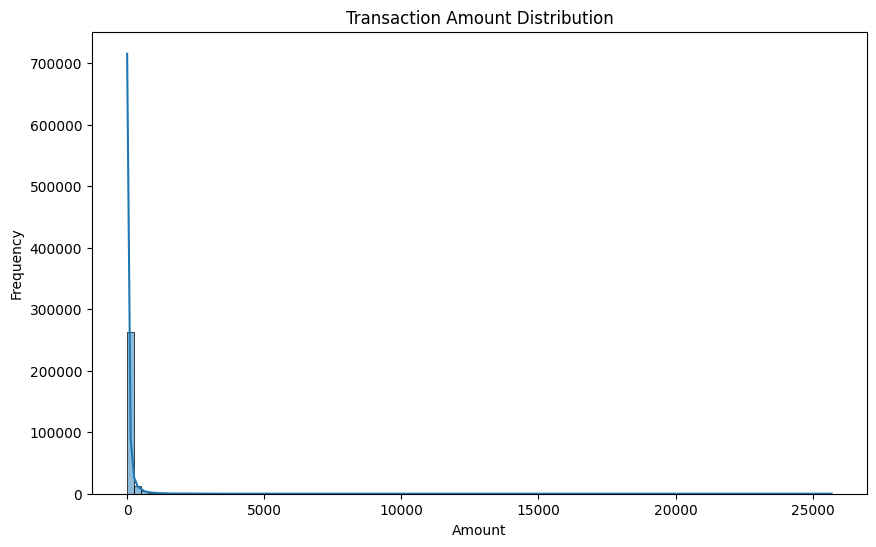

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


2. 🌲 Isolation Forest Implementation

In [ ]:
from sklearn.ensemble import IsolationForest

# We'll use all features except 'Time' and 'Class'
features = df.drop(['Time', 'Class', 'Amount_Zscore', 'Z_Outlier'], axis=1)

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)

# Fit the model
iso_forest.fit(features)

# Predict anomalies
df['IF_Pred'] = iso_forest.predict(features)

# Map predictions to boolean values
df['IF_Outlier'] = df['IF_Pred'].apply(lambda x: x == -1)


In [ ]:
# Count of identified outliers
print("Number of outliers detected by Isolation Forest:", df['IF_Outlier'].sum())

# Compare with actual fraud cases
if_outliers = df[df['IF_Outlier'] == True]
frauds_in_if_outliers = if_outliers['Class'].sum()
print("Number of actual frauds in Isolation Forest outliers:", frauds_in_if_outliers)


Number of outliers detected by Isolation Forest: 14
Number of actual frauds in Isolation Forest outliers: 0.0


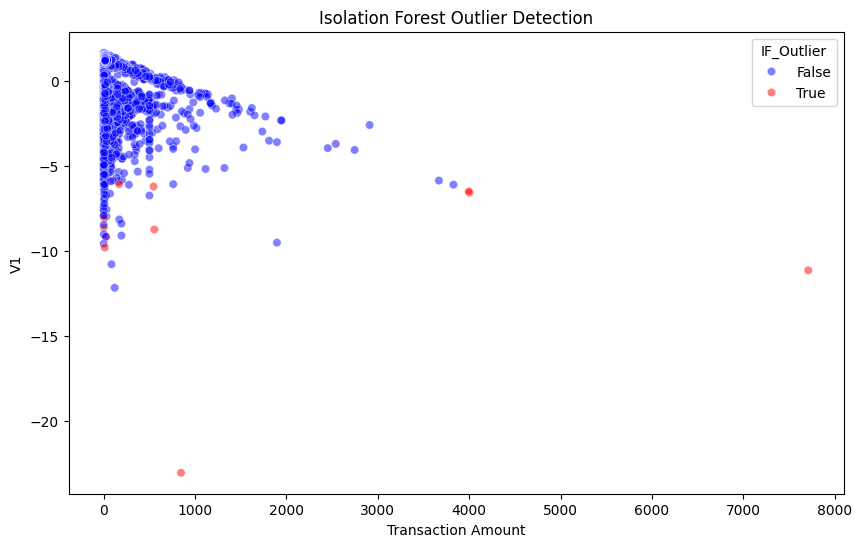

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Amount', y='V1', data=df, hue='IF_Outlier', palette={True: 'red', False: 'blue'}, alpha=0.5)
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Transaction Amount')
plt.ylabel('V1')
plt.show()
